In [147]:
from skimage import io #Libreria para importar imagen desde el directorio en uso o en su defecto se pone la direccion completa del archivo
from skimage import img_as_float #Transformar una imagen a valores float entre 0 y 1
from skimage.color import rgb2gray #Pasar una imagen a escala de grises
import matplotlib.pyplot as plt #Importar libreria para graficos
from skimage import filters #filtros, por ahora usamos triangle
from skimage import morphology #Para dilation y erosion, y sus derivados
import numpy as np 
import scipy.ndimage as ndi
%matplotlib inline
import skimage.feature as skfeat
from math import sqrt

In [148]:
img = io.imread("C.tif")
img_float = img_as_float(img)
img_gray = rgb2gray (img_float)


In [149]:
ig, ax = plt.subplots(ncols = 3, figsize=(40, 40))

ax[0].imshow(img)
ax[0].set_title('Original', fontsize=40)
ax[1].imshow(img_float, cmap='gray')
ax[1].set_title('Original float', fontsize=40)
ax[2].imshow(img_gray, cmap='gray')
ax[2].set_title('Original in grey', fontsize=40)

Text(0.5,1,'Original in grey')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025458D4EA60> (for post_execute):


ValueError: Image RGB array must be uint8 or floating point; found uint16

ValueError: Image RGB array must be uint8 or floating point; found uint16

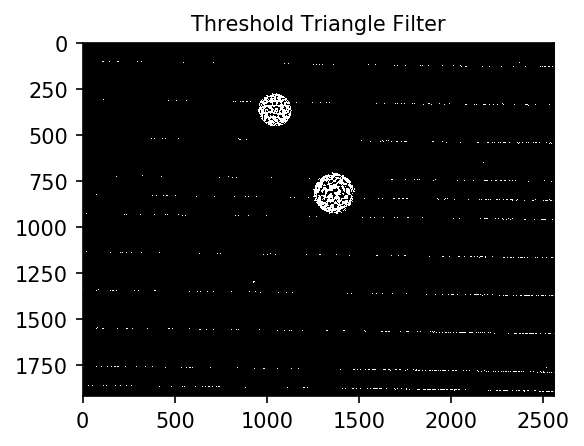

In [150]:
thres = filters.threshold_triangle (img_gray)

img_thres= img_gray < thres

plt.figure(figsize=(4, 4), dpi=150)
plt.title('Threshold Triangle Filter', fontsize=10)
io.imshow(img_thres, cmap = 'gray')



Text(0.5,1,'Recover important objects')

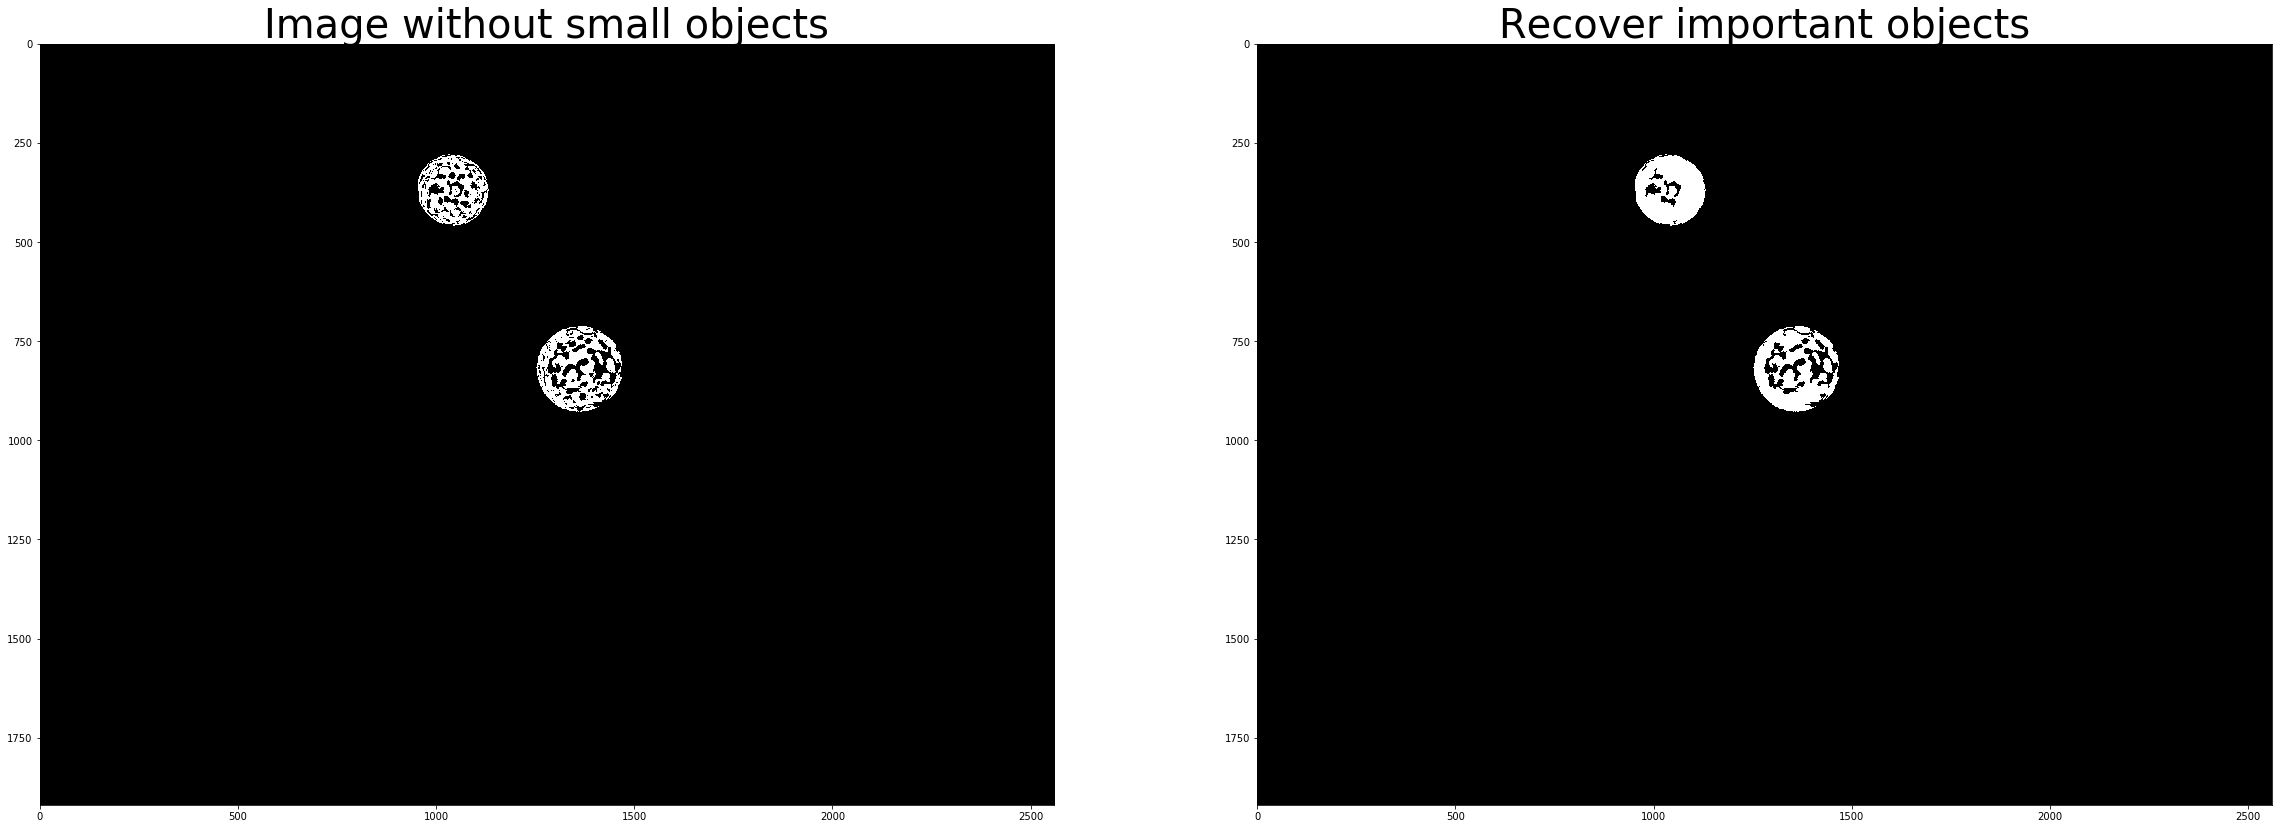

In [151]:
img_sobj = morphology.remove_small_objects(img_thres,min_size=300)#300
img_addobj = np.logical_not(morphology.remove_small_objects(np.logical_not(img_sobj),  min_size=300))

ig, ax = plt.subplots(ncols = 2, figsize=(40, 40))

ax[0].imshow(img_sobj, cmap='gray')
ax[0].set_title('Image without small objects', fontsize=40)
ax[1].imshow(img_addobj, cmap='gray')
ax[1].set_title('Recover important objects', fontsize=40)


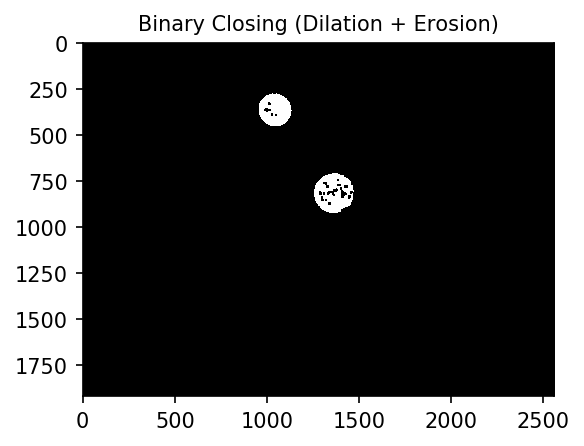

In [152]:
img_closing = morphology.binary_closing (img_addobj, selem = np.ones((10,10)))
plt.figure(figsize=(4, 4), dpi=150)
plt.title('Binary Closing (Dilation + Erosion)', fontsize=10)
io.imshow(img_closing, cmap = 'gray')


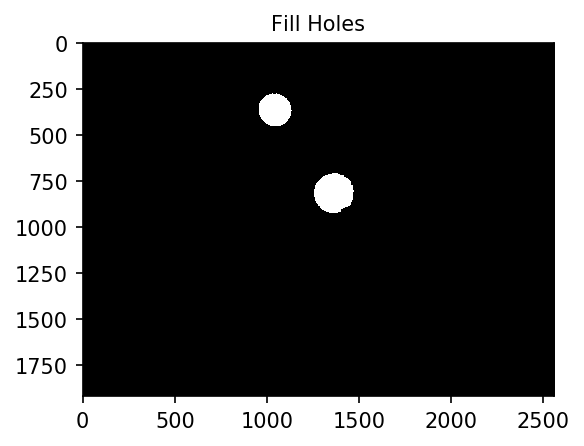

In [153]:
img_fill=ndi.binary_fill_holes(img_closing).astype(float)
plt.figure(figsize=(4, 4), dpi=150)
plt.title('Fill Holes', fontsize=10)
io.imshow(img_fill, cmap = 'gray')

In [154]:
a = skfeat.blob_doh (img_fill,min_sigma= 40.0, max_sigma=100.0, num_sigma=10, overlap=0.5)


In [155]:
print(a)
a.shape
type(a)

[[  819.          1359.           100.        ]
 [  366.          1039.            93.33333333]]


numpy.ndarray

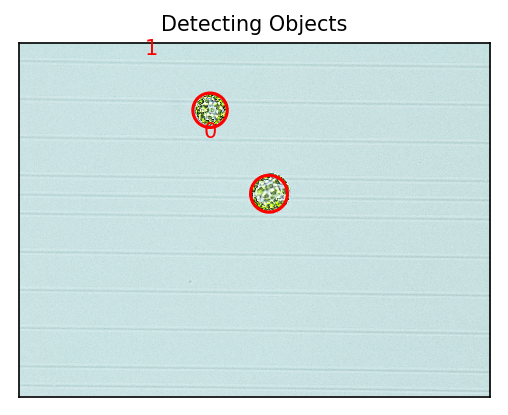

In [157]:
plt.figure(figsize=(4,4), dpi=150)
plt.title('Detecting Objects', fontsize=10)
io.imshow(img_float)
for i in range(len(a)):
    circle = plt.Circle((a[i,1], a[i,0]), a[i,2], color='r', fill=False , lw=1.5)
    fig = plt.gcf()#Para trabajar sobre los ejes y figura de arriba
    ax = fig.gca()#All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance).
    ax.add_artist(circle)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.annotate(i, xy=(a[i,1], a[i,0]), xytext=(-25, 25),
                     textcoords='offset points', ha='right', va='bottom',
                     color='red')
